**Task-01**: **Exploring Stroke Risk Using Health Data**


**Objective:**


To visualize the distribution of categorical and continuous variables — such as age and gender — and explore their relationship with the occurrence of stroke.

 **Data Cleaning**


Loaded the Stroke Prediction Dataset from Kaggle.

Used .info() and .describe() to understand data structure.

In [2]:
#importing necessary libraries

import pandas  as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the data
df = pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Checked for missing values and found that BMI had 201 missing values which is significantly high.

In [6]:
df.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Checked the  distribution of the bmi so  as to know what to impute as a way of dealinng with the missing values

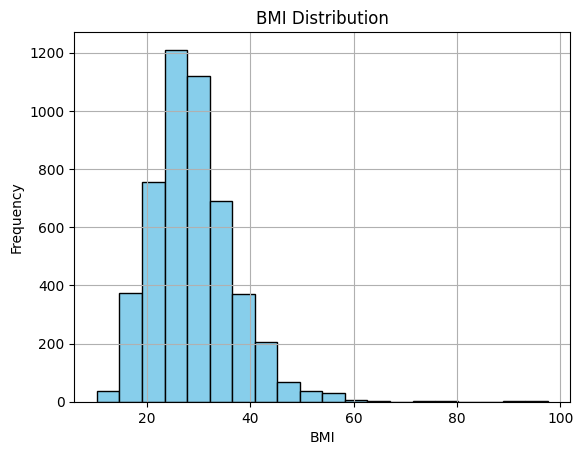

In [7]:
import matplotlib.pyplot as plt

df['bmi'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


In [8]:
print("Skewness:", df['bmi'].skew())


Skewness: 1.0553402052962912


The BMI was rightly  skewed hence the most appropriate imputation was with the median. The missing values have now been handled and our data has been cleanedd

In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


In [25]:
df.isnull().sum()



,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


After cleaning the dataset, I wanted to better understand the distribution of the target variable: stroke.

To do this, I created a bar chart to visualize how many individuals in the dataset had experienced a stroke (1) compared to those who had not (0).

I also calculated the percentage of each class to better understand the data imbalance.

The results show that the dataset is highly imbalanced, with approximately 95% of individuals having no history of stroke and only about 5% having experienced a stroke.

This indicates that stroke cases are relatively rare in the dataset, which is important to consider when analyzing risk factors or building predictive models.
It also highlights the need to pay special attention to the minority class (stroke cases) during further exploration and analysis.

/tmp/ipython-input-12-117199418.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stroke', palette='Set2')


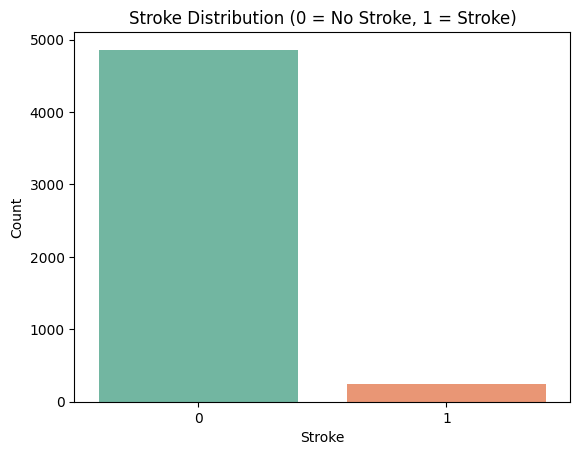

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [12]:
sns.countplot(data=df, x='stroke', palette='Set2')
plt.title('Stroke Distribution (0 = No Stroke, 1 = Stroke)')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

print(df['stroke'].value_counts(normalize=True) * 100)


To explore whether gender plays a role in stroke occurrence, I created a grouped bar chart showing the number of stroke and non-stroke cases for both males and females.

The chart displays two bars for each gender: one for those who had a stroke and one for those who didn’t.

While the overall number of females is slightly higher in the dataset, the distribution of stroke cases across genders appears fairly similar, suggesting that gender may not be a strong distinguishing factor on its own.

However, further analysis combining gender with other variables like age or health conditions may reveal deeper insights.

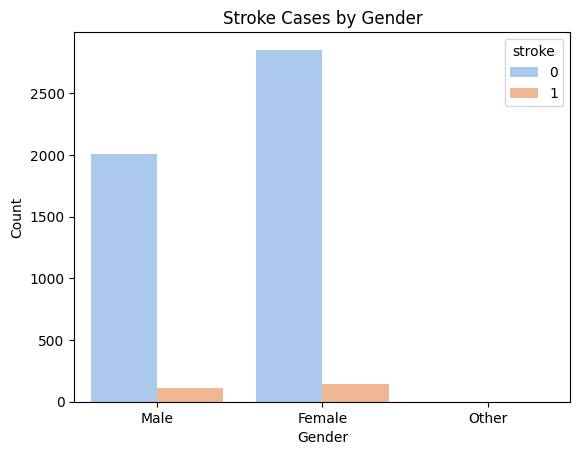

In [13]:
sns.countplot(data=df, x='gender', hue='stroke', palette='pastel')
plt.title('Stroke Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


To investigate whether smoking habits are linked to stroke risk, I visualized stroke cases across different smoking status categories: formerly smoked, never smoked, smokes, and Unknown.

The chart shows that strokes occur in all smoking groups, including those who never smoked, but there appears to be a slightly higher number of stroke cases among people who currently smoke or formerly smoked.

This suggests that smoking may be associated with an increased risk of stroke, although it should be analyzed alongside other risk factors like age, hypertension, and glucose levels for a more complete picture.

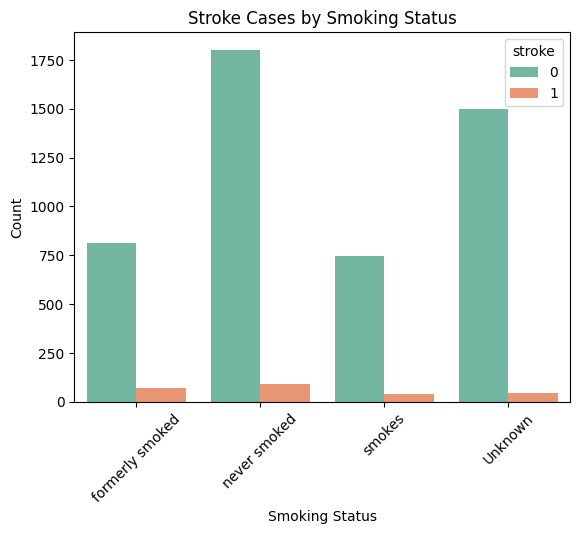

In [14]:
sns.countplot(data=df, x='smoking_status', hue='stroke', palette='Set2')
plt.title('Stroke Cases by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


To understand the overall age profile of the patients, I created a histogram of the age column.

The distribution shows that most individuals in the dataset are between 40 and 70 years old, with fewer people under 30 or over 80.

This indicates that the dataset is largely made up of middle-aged and elderly individuals, which is important since age is a known risk factor for stroke.

The spread also helps identify which age groups may require more focused analysis when examining stroke patterns.



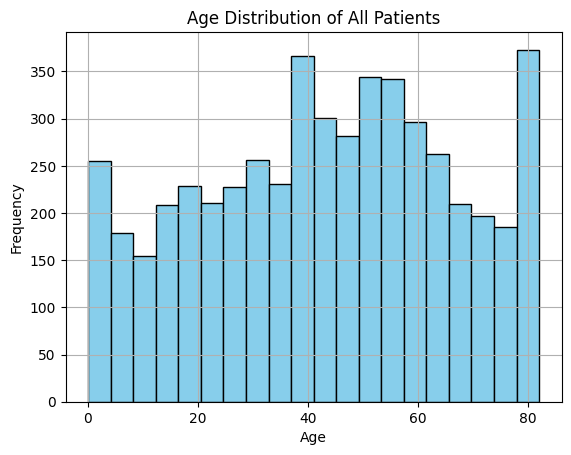

In [15]:
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of All Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


To understand how gender is distributed across different age ranges, I created an age group column and plotted a grouped bar chart.

The chart shows that both men and women are well represented in the age ranges between 31 and 70, with fewer individuals in the <30 and 71+ age groups.

Interestingly, the 51–70 age group has the highest number of individuals overall, with a fairly balanced gender distribution.

This visualization helps give context to age and gender trends when analyzing stroke risk in specific groups.

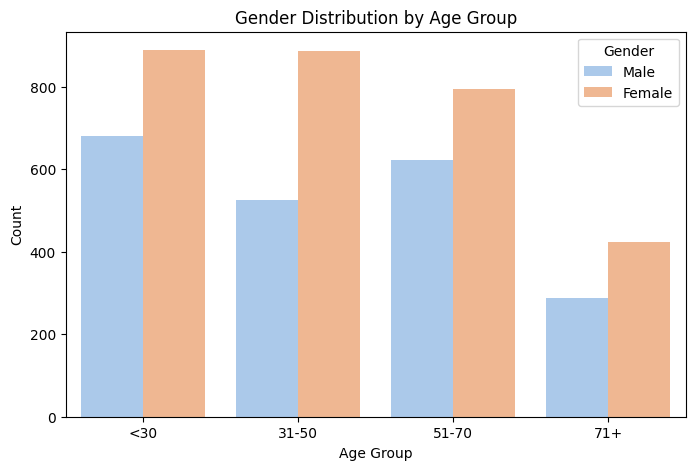

In [26]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['<30', '31-50', '51-70', '71+'])


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age_group', hue='gender', palette='pastel', hue_order=['Male', 'Female'])
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

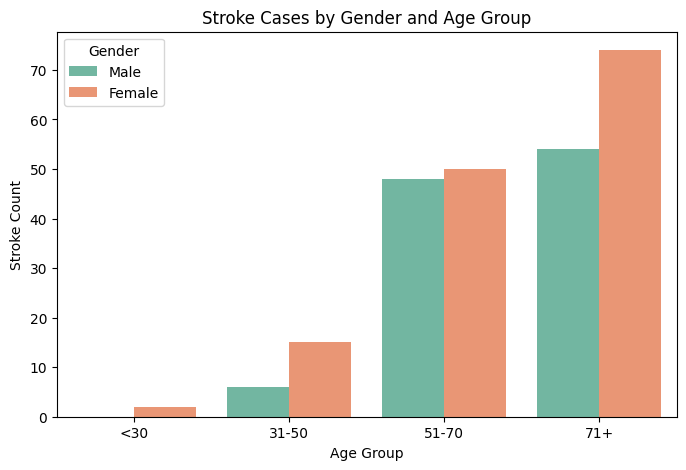

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df['stroke'] == 1], x='age_group', hue='gender', palette='Set2')
plt.title('Stroke Cases by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Count')
plt.legend(title='Gender')
plt.show()


To identify which age groups and genders are most affected by stroke, I filtered the data to show only individuals who had a stroke and grouped them by both age and gender.

The chart reveals that most stroke cases occur in the 51–70 and 71+ age groups, with both men and women represented.

While there are fewer stroke cases in younger age groups (<30 and 31–50), strokes can still occur across all age ranges.

This visualization highlights age as a major risk factor, and also suggests that stroke affects both genders relatively equally within high-risk age brackets.



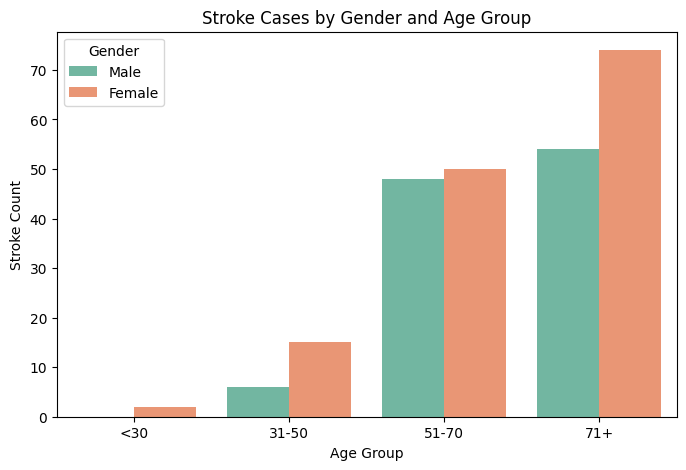

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df['stroke'] == 1], x='age_group', hue='gender', palette='Set2')
plt.title('Stroke Cases by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Count')
plt.legend(title='Gender')
plt.show()


This chart explores the relationship between hypertension (high blood pressure) and the occurrence of stroke.

The results show that while the majority of stroke cases occurred among individuals without hypertension (simply because they are the majority overall), the proportion of stroke cases is noticeably higher among those with hypertension.

This suggests that hypertension is a significant risk factor for stroke, reinforcing existing medical knowledge.

It also emphasizes the importance of managing blood pressure as a preventive measure for stroke.

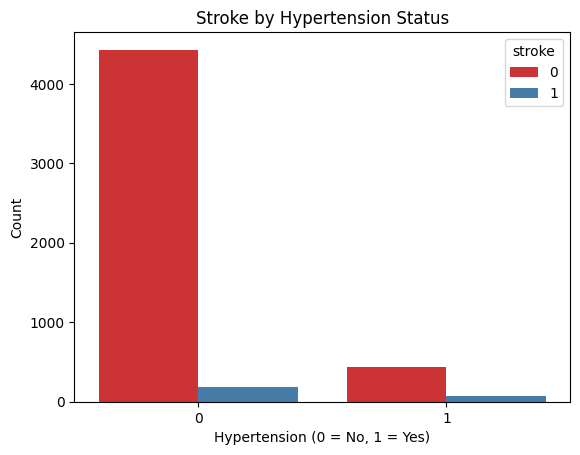

In [19]:
sns.countplot(data=df, x='hypertension', hue='stroke', palette='Set1')
plt.title('Stroke by Hypertension Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


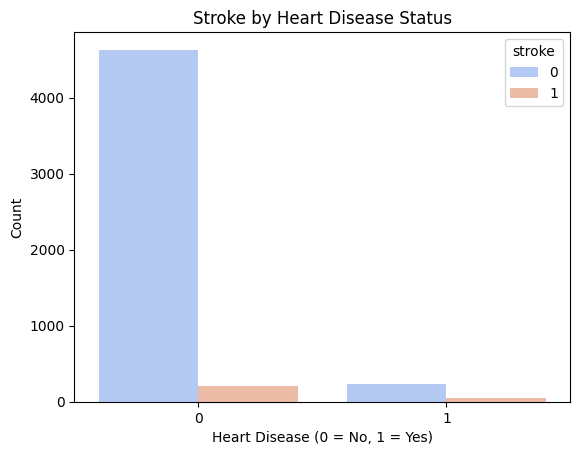

In [20]:
sns.countplot(data=df, x='heart_disease', hue='stroke', palette='coolwarm')
plt.title('Stroke by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-21-2598510670.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='bmi', palette='Set2')


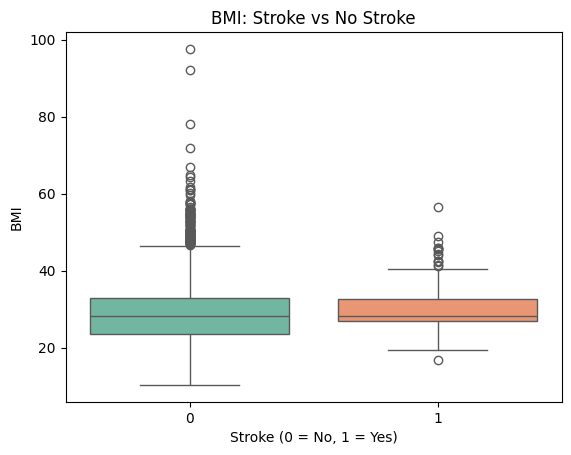

In [21]:
sns.boxplot(data=df, x='stroke', y='bmi', palette='Set2')
plt.title('BMI: Stroke vs No Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


After cleaning and analyzing the stroke prediction dataset, several key insights emerged.

The dataset is highly imbalanced, with only about 5% of individuals having experienced a stroke.

Age is a significant factor — stroke cases increase notably in the 51–70 and 71+ age groups.

Hypertension and heart disease are both clearly associated with a higher proportion of strokes.

While stroke affects both men and women, the gender difference is not drastic.

Smoking status may also play a role, with more stroke cases among current and former smokers.

These findings support known medical risk factors for stroke and highlight the importance of early screening, especially among older adults with underlying conditions like hypertension or heart disease.
The dataset provides a strong foundation for building predictive models that can help identify at-risk individuals and guide preventive care efforts.